# Preparation

## Import Libraries

In [1]:
!pip install bertviz

     |████████████████████████████████| 155 kB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 30.8 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 30.1 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 8.6 MB 33.6 MB/s eta 0:00:01


In [1]:
import os
import json
import numpy as np
import pandas as pd
from attrdict import AttrDict
from transformers import (
    BertTokenizer,
    ElectraTokenizer,
)
from transformers import pipeline, utils, ElectraForSequenceClassification
from bertviz import model_view

# Use KcELECTRA

## Load KcELECTRA

In [2]:
Model = {
    'ElectraForSequenceClassification' : ElectraForSequenceClassification,
    
}
Tokenizer ={
    "BertTokenizer": BertTokenizer,
    "ElectraTokenizer": ElectraTokenizer,
}

In [153]:
# config 파일 불러오기
config_path = os.path.join('/USER/Comment/exp_config/config.json')

def set_config(config_path):
    if os.path.lexists(config_path):
        with open(config_path) as f:
            args = AttrDict(json.load(f))
            print("config file loaded.")
            print(args.pretrained_model)
    else:
        assert False, 'config json file cannot be found.. please check the path again.'
    
    return args


# 코드 중간중간에 끼워넣어 리셋 가능
args = set_config(config_path)

config file loaded.
beomi/KcELECTRA-base


In [4]:
pipe_bias = pipeline('text-classification', model=args.pretrained_model, device=0)

In [159]:
model = Model[args.architecture].from_pretrained(args.pretrained_model, output_attentions=True, output_hidden_states=True)  # Configure model to return attention values
# print(model)
input_text = '참으로 아름다운 커플입니다. 늘 행복하시고 새해에도 늘 꽃길만 걸으시길 축원합니다 ...'
tokenizer = Tokenizer[args.tokenizer_class].from_pretrained(args.pretrained_model)
inputs = tokenizer.encode(input_text, return_tensors='pt')  # Tokenize input text
outputs = model(inputs)  # Run model
attentions = outputs.attentions # Retrieve attention from model outputs
hiddens = outputs.hidden_states
tokens = tokenizer.convert_ids_to_tokens(inputs[0])  # Convert input ids to token strings
# print(outputs.hidden_states[0].size())
# print(attentions[0].size())
# model_view(attentions, tokens)  # Display model view

Some weights of the model checkpoint at beomi/KcELECTRA-base were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.out_proj.weight', 'classifi

torch.Size([1, 12, 25, 25])


torch.Size([1, 12, 16, 16])
1
torch.Size([12, 16, 16])
torch.Size([12, 16, 16])


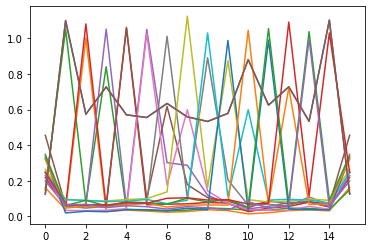

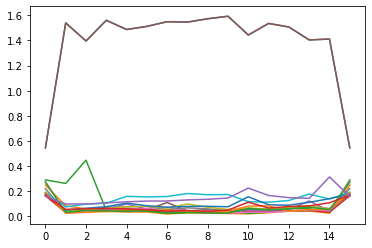

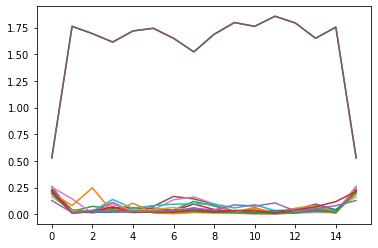

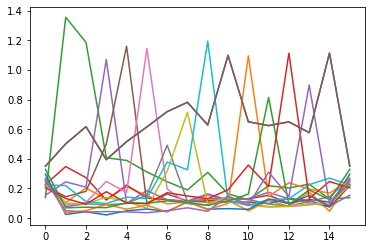

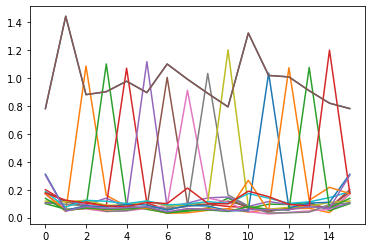

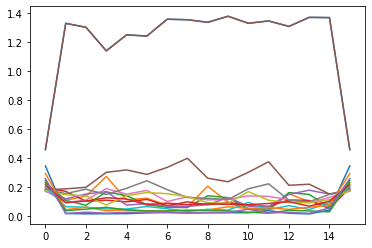

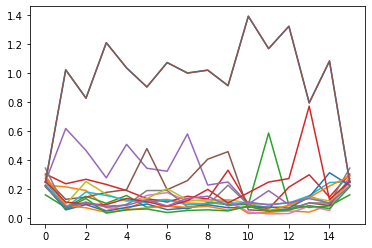

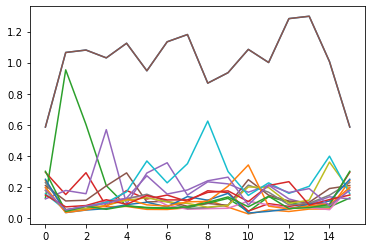

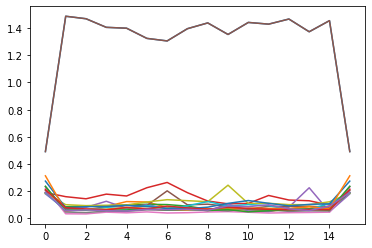

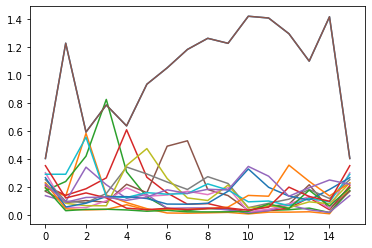

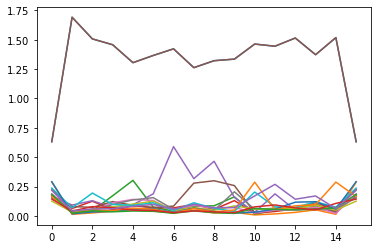

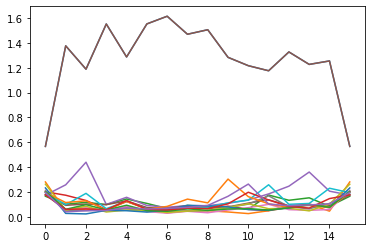

<Figure size 432x288 with 0 Axes>

In [110]:
import torch
import matplotlib.pyplot as plt

print(attentions[0].size())
a = torch.zeros(attentions[0].size())
for attention in attentions[-4:]:
    a += attention.squeeze(0)
    # print(attention.size(), attention[0][1])

# print(a)
print(len(a))
print(a[0].size())
b = torch.zeros(a[0].size())

for i in a:
    b += i.squeeze(0)

print(b.size())
for i in range(len(b)):
    # print(i)
    plt.plot(b[i].detach().numpy())
    plt.figure()

torch.Size([1, 29, 768])
<class 'torch.Tensor'>


/tmp/ipykernel_38917/2967391420.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


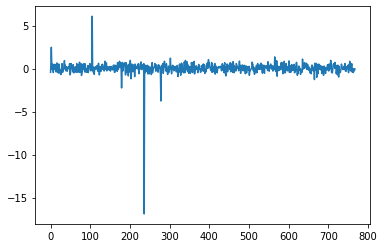

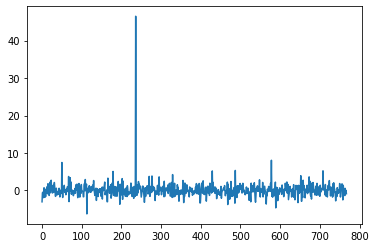

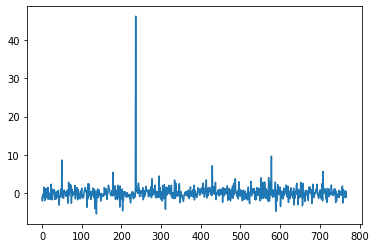

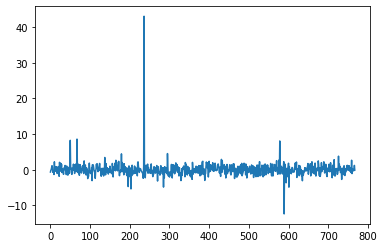

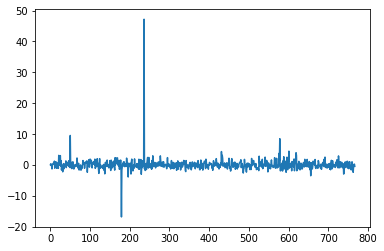

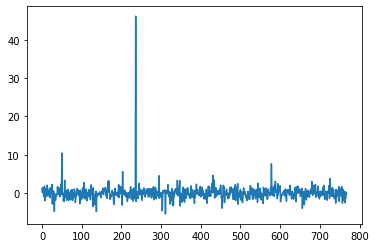

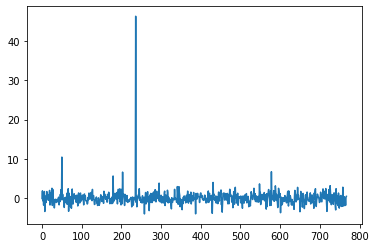

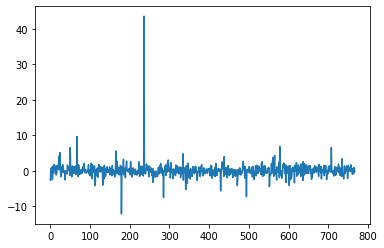

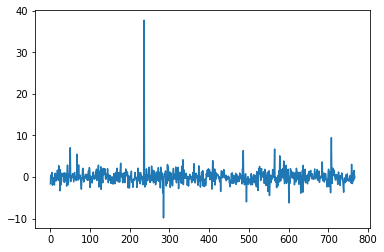

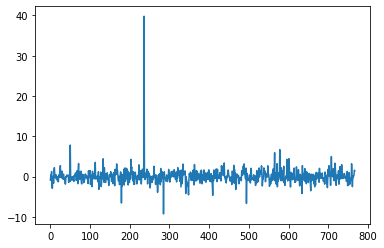

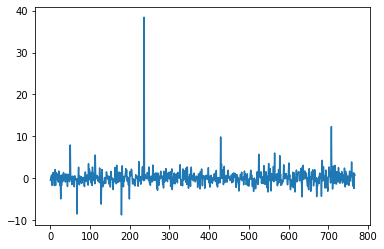

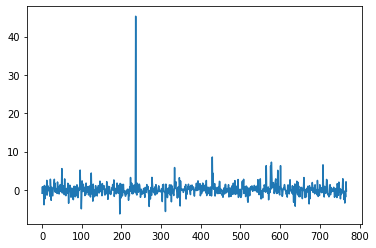

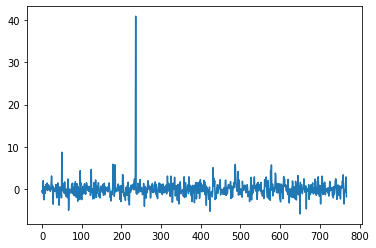

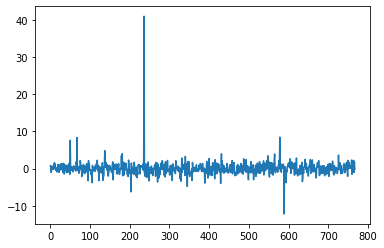

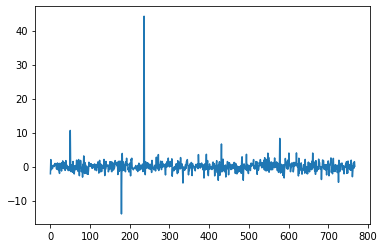

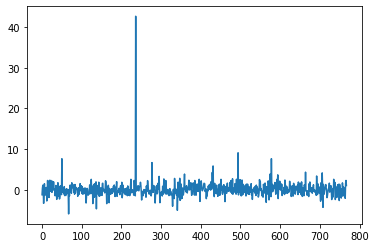

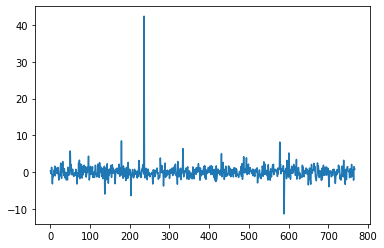

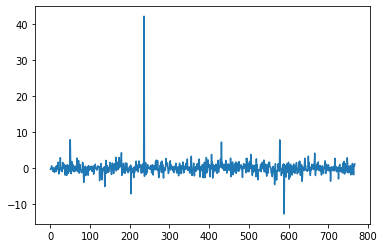

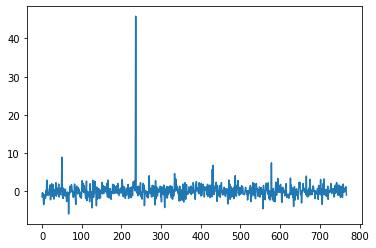

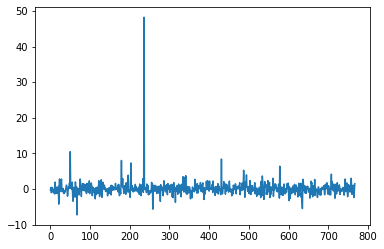

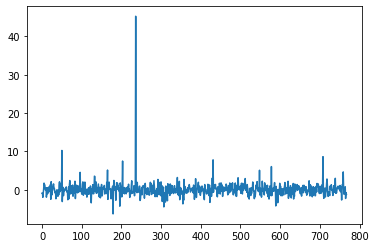

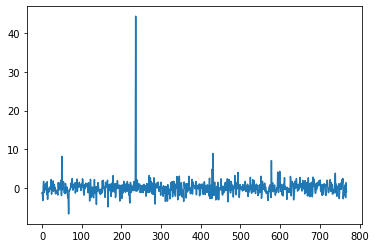

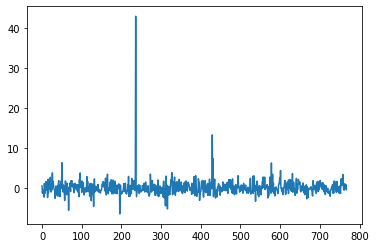

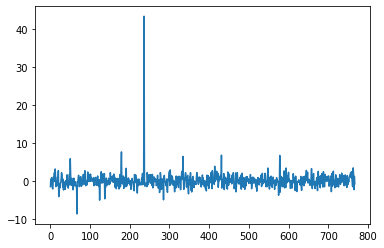

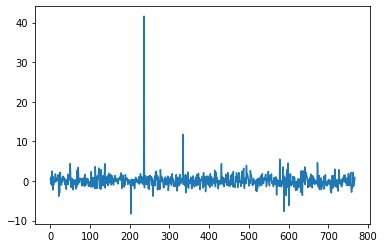

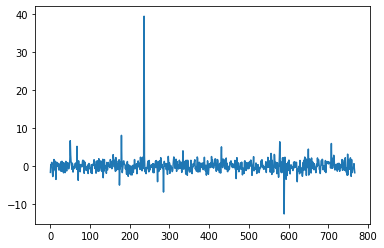

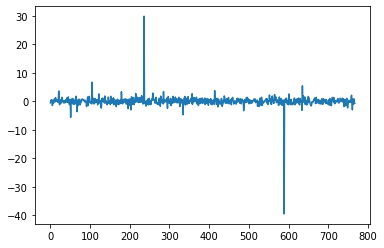

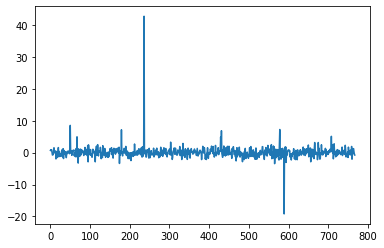

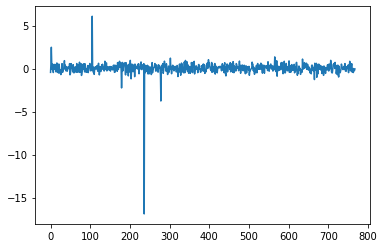

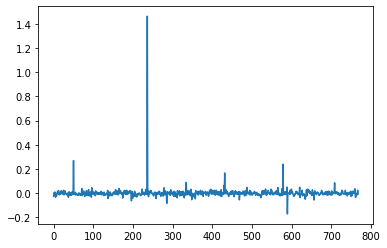

In [155]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

# print(hiddens)
a = torch.zeros(hiddens[0].size())
# print(a)
for hidden in hiddens[-4:]:
    # print(hidden)
    a += hidden.squeeze(0) 
    # print(attention.size(), attention[0][1])

print(a.size())


print(type(a))

b = a.squeeze(0)
c = torch.zeros(a.squeeze(0)[0].size())
token_num = len(c)

for i in b:
    # print(i.)
    # print(i.size())
    plt.plot(range(768), i.detach().numpy())
    plt.figure()
    c += i
c = c/token_num
plt.plot(range(768), c.detach().numpy())

torch.Size([1, 25, 768])
<class 'torch.Tensor'>


/tmp/ipykernel_38917/955947482.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


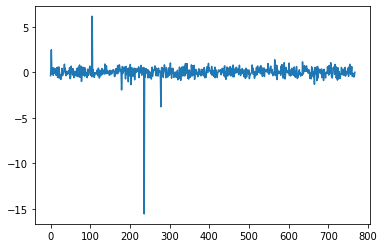

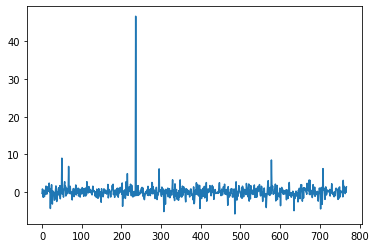

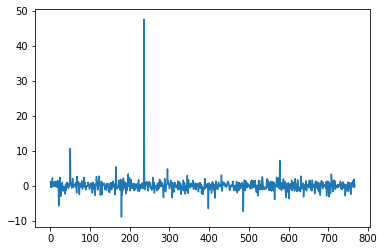

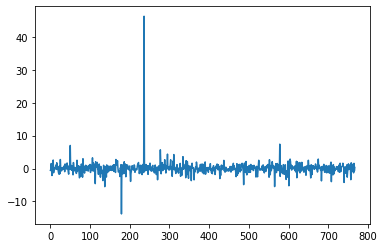

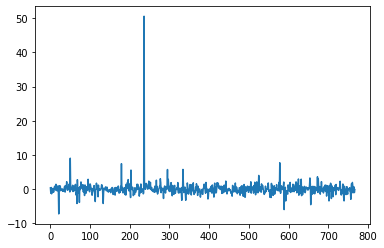

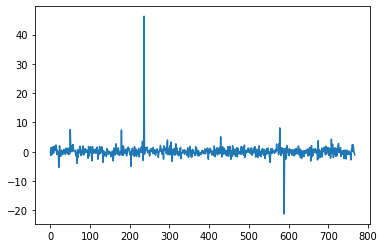

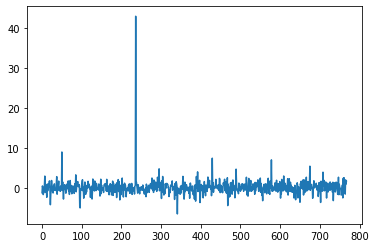

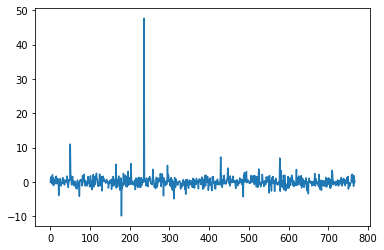

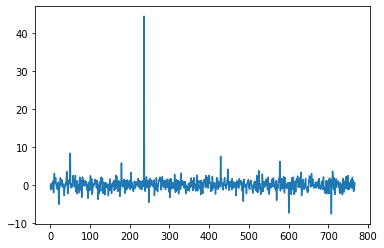

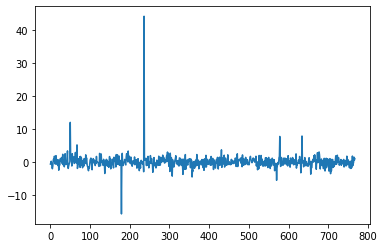

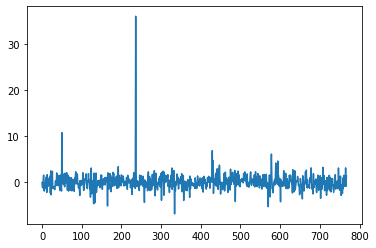

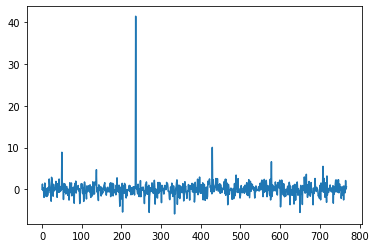

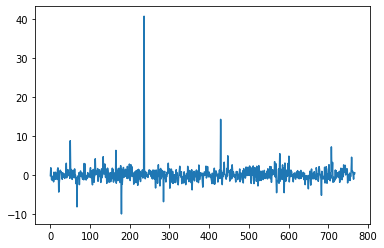

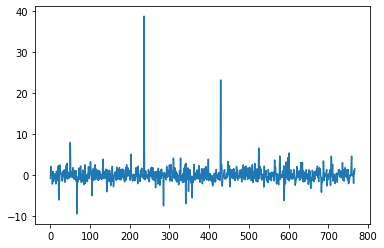

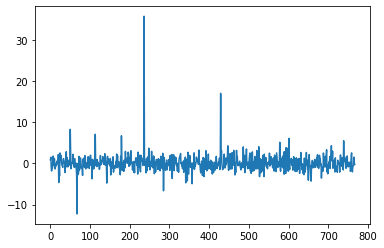

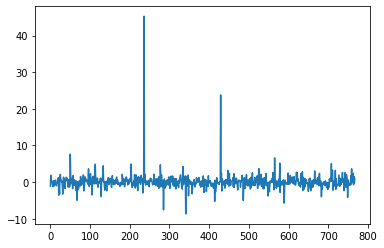

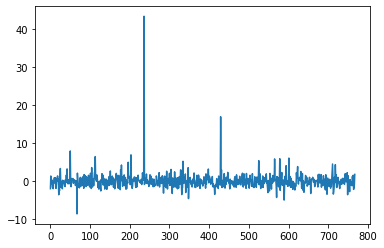

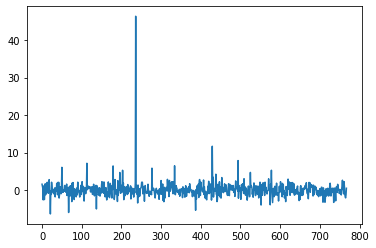

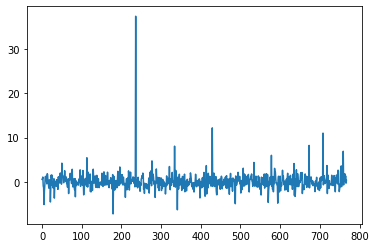

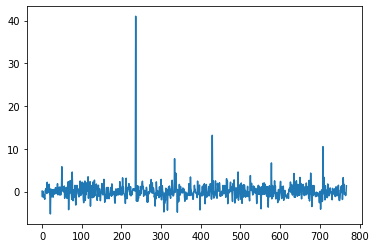

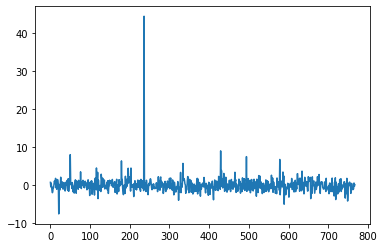

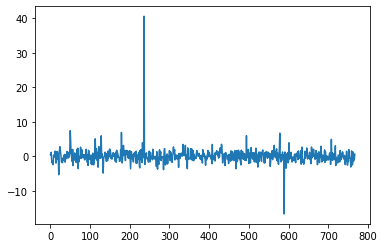

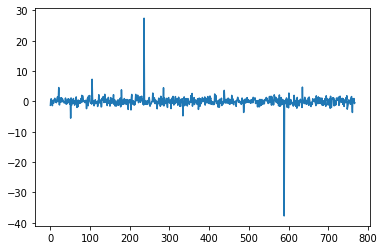

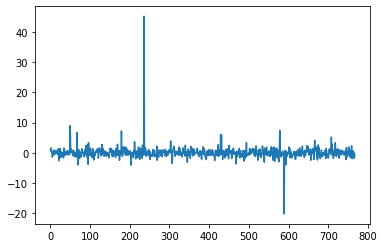

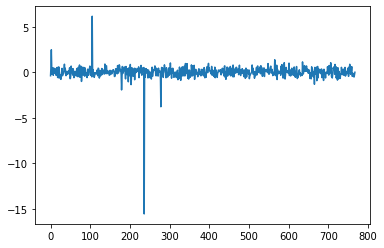

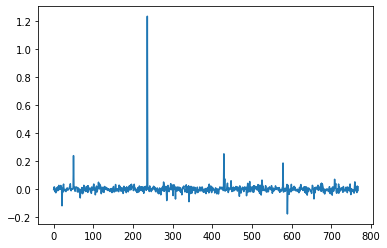

In [160]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

# print(hiddens)
a = torch.zeros(hiddens[0].size())
# print(a)
for hidden in hiddens[-4:]:
    # print(hidden)
    a += hidden.squeeze(0) 
    # print(attention.size(), attention[0][1])

print(a.size())


print(type(a))

b = a.squeeze(0)
c = torch.zeros(a.squeeze(0)[0].size())

l = len(c)

for i in b:
    # print(i.)
    # print(i.size())
    plt.plot(range(768), i.detach().numpy())
    plt.figure()
    c += i
c = c/l
plt.plot(range(768), c.detach().numpy())

In [156]:
pipe_hate = pipeline('text-classification', model='beomi/KcELECTRA-base', device=0)

Some weights of the model checkpoint at beomi/KcELECTRA-base were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.out_proj.weight', 'classifi

In [157]:
pipe_hate

In [114]:
pipe_bias('아이는 대부분 엄마가 원해서낳고 독박육아하고남편은 그냥 따라고는 수준!싫은 내색도 못하고 심지어 부담스러워하더라!')

[{'label': 'gender', 'score': 0.9975603818893433}]

In [158]:
pipe_hate("재미가 없어요")

[{'label': 'LABEL_0', 'score': 0.5220497250556946}]

## Load data

In [139]:
df = pd.read_csv('/USER/Comment/data/train.csv')

In [141]:
df.tail(10)

,title,comment,bias,hate
8357,"""이혜정, 남편 외도 고백 """"나보다 못한 여자랑..용서 못해""""""",바람피운건 잘못은 맞지만 외모평가는 저 근거없는 자신감은 어서 나오는걸까,gender,hate
8358,"""정준호♥이하정 딸 유담, 누굴 닮아 이렇게 예쁠까..""""평화로운 주말 아빠 빼고""""""",정준호딸맞네 똑닮앗네,none,none
8359,"""""""행복하길"""" 이용진 결혼, 동료들만? 대중 응원도 쇄도하는 이유(종합)[Oh!...",축하해요! 웃을때 너무 이뻐요~~,none,none
8360,"""[전문]슈퍼주니어 은혁, 웬디 사고에 """"제대로 갖춰진 환경서 춤출수 있기를""""""","빅뱅,BTS 리스펙하는 아이돌은 봐서도 슈주 리스펙하다는 아이돌은 못봤다....",none,hate
8361,"""""""러브스토리→탈모고백"""" '냉부해' 고지용♥허양임, 솔직달콤 '비주얼' 부부 (...",슈돌하차해도 승재랑도같이 방송 출연 해주세요~~승재 너무 보고싶을듯ㅠ 가족 행복하세요♡,none,none
8362,"""배우 이필립, SNS 스타 연인에게 초호화 프러포즈 눈길""",아니 근데.튜닝한사람은 프러포즈받지도.결혼도못함?ㅋㅋㅋ지들은 돈없어서 못하는것들이ㅋ...,others,hate
8363,"""[SC이슈]""""마약·백스텝·김새롬 탓"""" '실형 피한' 이찬오, 이미지는 치명상(...",그러니깐 여자를 잘만나야되~징글징글한것들 만나면 인생 끝가지 돌아가게 되는듯.. 근...,gender,hate
8364,"""[POP이슈]""""그들만의 세상""""…홍상수♥김민희, 새해데이트에 '반응싸늘'""",참으로 아름다운 커플입니다. 늘 행복하시고 새해에도 늘 꽃길만 걸으시길 축원합니다 ...,none,none
8365,[종합] '시크릿 마더' 김소연 누가 죽였나…송윤아와 갈등,재미가 없어요,none,none
8366,"""허지웅·소속사 """"악성림프종 진단, 치료 전념"""" (공식)""",쭉 쉬세요,none,hate


## Make discrimination

In [103]:
df['bias'] = df['comment'].map(lambda x: pipe_bias(x)[0]['label'])

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:978: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,


In [104]:
df['hate'] = df['comment'].map(lambda x: pipe_hate(x)[0]['label'])

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:978: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,


### Counts labels

In [105]:
df.bias.value_counts()

none      338
gender    107
others     66
Name: bias, dtype: int64

In [106]:
df.hate.value_counts() # 과제에서 사용하지않는 offensive label이 존재함

offensive    186
none         181
hate         144
Name: hate, dtype: int64

### Change 'offensive' label to 'hate' label

In [107]:
LABEL_DIC = {
    'none': 'none',
    'offensive': 'hate',
    'hate': 'hate',
}

In [108]:
df['hate'] = df['hate'].map(lambda x: LABEL_DIC[x])

In [109]:
df.hate.value_counts()

hate    330
none    181
Name: hate, dtype: int64

# Save Result

In [110]:
result = df[['ID', 'bias', 'hate']]
result

,ID,bias,hate
0,0,none,none
1,1,none,none
2,2,none,hate
3,3,none,hate
4,4,others,hate
...,...,...,...
506,506,none,none
507,507,none,none
508,508,others,hate
509,509,others,hate


In [111]:
result.to_csv('kcelectra.csv', index=None)